# This notebook replicates the 9 macro regions using `NAM_0` from the World Bank Admin 0_all_layers dataset.
This notebook follows a simple flow: load the Admin 0_all_layers dataset, clean names, define the 9 macro regions, compare lists against NAM_0 to spot mismatches, then visualize regions by NAM_0 and by ISO3.


## 1. Load data

In [11]:
from pathlib import Path
import geopandas as gpd


base_dir = Path.cwd().parents[0]  
data_dir = base_dir / "Data" / "World Bank Official Boundaries - Admin 0_all_layers"
shp_path = data_dir / "WB_GAD_ADM0_complete.shp"
gdf = gpd.read_file(shp_path)
gdf.head()

,ISO_A3,ISO_A2,WB_A3,HASC_0,GAUL_0,WB_REGION,WB_STATUS,SOVEREIGN,NAM_0,geometry
0,CHN,CN,CHN,CN,147295,EAP,Member State,CHN,China,"MULTIPOLYGON (((117.58675 38.59517, 117.58909 ..."
1,JPN,JP,JPN,JP,126,Other,Member State,JPN,Japan,"MULTIPOLYGON (((137.48411 34.67386, 137.46683 ..."
2,KOR,KR,KOR,KR,202,EAP,Member State,KOR,Republic of Korea,"MULTIPOLYGON (((126.05363 36.19852, 126.05372 ..."
3,PRK,KP,PRK,KP,67,Other,Non Member State,PRK,D. P. R. of Korea,"MULTIPOLYGON (((126.95508 38.16282, 126.95184 ..."
4,RUS,RU,RUS,RU,204,ECA,Member State,RUS,Russian Federation,"MULTIPOLYGON (((130.61904 48.88019, 130.60659 ..."


In [12]:
# Corrections and additions
gdf["ISO_A3_CUSTOM"] = gdf["ISO_A3"]
#Add custom ISO_A3 codes for disputed territories
gdf.loc[gdf["NAM_0"] == "Arunachal Pradesh", "ISO_A3_CUSTOM"] = "ARP"
gdf.loc[gdf["NAM_0"] == "Jammu and Kashmir", "ISO_A3_CUSTOM"] = "JMK"
gdf.loc[gdf["NAM_0"] == "Aksai Chin", "ISO_A3_CUSTOM"] = "AKC"
gdf.loc[gdf["NAM_0"] == "Gilgit Baltistan", "ISO_A3_CUSTOM"] = "GGB"
gdf.loc[gdf["NAM_0"] == "Abyei", "ISO_A3_CUSTOM"] = "ABY"
#change French caribbeanislands names
gdf.loc[gdf["ISO_A3"] == "GUF", "NAM_0"] = "French Guyana"
gdf.loc[gdf["ISO_A3"] == "GLP", "NAM_0"] = "Guadalupe (Fr.)"
gdf.loc[gdf["ISO_A3"] == "MTQ", "NAM_0"] = "Martinique (Fr.)"

# 1) Find names with non-ASCII characters in NAM_0
bad = [n for n in gdf["NAM_0"].dropna().unique() if any(ord(ch) > 127 for ch in n)]
sorted(bad)

# 2) Cleaning dict
name_fixes = {
    "TÃ¼rkiye": "Turkey",
    "CÃ´te d'Ivoire": "Cote d'Ivoire",
    "SÃ£o TomÃ© and PrÃ\xadncipe": "Sao Tome and Principe",
    "CuraÃ§ao (Neth.)": "Curacao (Neth.)",
    "Saint-BarthÃ©lemy (Fr.)": "Saint-Barthelemy (Fr.)",
}

# 3) Apply only to NAM_0
gdf["NAM_0"] = gdf["NAM_0"].replace(name_fixes)

# 4) Verify
gdf[gdf["NAM_0"].isin(name_fixes.values())][["NAM_0","ISO_A3","WB_A3"]].head()


,NAM_0,ISO_A3,WB_A3
26,Turkey,TUR,TUR
133,Cote d'Ivoire,CIV,CIV
159,Sao Tome and Principe,STP,STP
191,Saint-Barthelemy (Fr.),BLM,BLM
227,Curacao (Neth.),CUW,CUW


## 3. Region lists (original)

In [13]:
# EUROPE
EUROPE = [
    'Aaland (Fin.)','Albania','Andorra','Austria','Belgium','Bosnia and Herzegovina',
    'Bulgaria','Croatia','Czech Republic','Denmark','Estonia','Faroe Islands (Den.)',
    'Finland','France','Germany','Greece','Guernsey (U.K.)','Hungary','Iceland',
    'Ireland','Isle of Man (U.K.)','Italy','Jersey (U.K.)','Kosovo','Latvia',
    'Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco',
    'Montenegro','Netherlands','North Macedonia','Norway','Poland',
    'Portugal','Serbia','Romania','San Marino','Slovak Republic','Slovenia',
    'Spain','Sweden','Switzerland','Ukraine','United Kingdom','Vatican City',
    'Turkey','Greenland (Den.)','Cyprus', 'UN Buffer Zone', 'Gibraltar (U.K.)',
    'Sovereign Base Areas of Akrotiri and Dhekelia (U.K.)', 'Svalbard and Jan Mayen (Nor.)']

# MENA
MENA = ['Afghanistan','Algeria', 'Arab Republic of Egypt', 'Bahrain', 
        'Iraq', 'Islamic Republic of Iran', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 
        'Morocco', 'Oman', 
        'Qatar', 'Republic of Yemen', 'Saudi Arabia', 'Syrian Arab Republic', 'Tunisia', 
        'United Arab Emirates', 'West Bank and Gaza', 'Pakistan', 'Gilgit Baltistan',
        'Israel', 'Golan Heights', 'Shebaa Farms Dispute']


# EURASIA
EURASIA = [
    "Russian Federation","Belarus",
    "Kazakhstan","Uzbekistan","Turkmenistan",
    "Kyrgyz Republic","Tajikistan",
    "Armenia","Azerbaijan","Georgia",
    "Mongolia"
]

# AFRICA
SUBSAHARAN_AFRICA = ["Abyei",'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
           'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 
           "Cote d'Ivoire", 'Democratic Republic of Congo', 'Equatorial Guinea', 
           'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 
           'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 
           'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 
           'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 
           'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 
           'Sao Tome and Principe', 'Tanzania', 'The Gambia', 'Togo', 
           'Uganda', 'Zambia', 'Zimbabwe', 'Ilemi Triangle', 'Western Sahara','Djibouti']
# INDIA PLUS
INDIA_PLUS = ['India','Nepal','Bhutan', 'Arunachal Pradesh', 'Jammu and Kashmir']

# ASIA REST
ASIA_REST = [
    "Bangladesh","Brunei Darussalam","Cambodia","Japan","Indonesia","Lao People's Democratic Republic",
    "Malaysia","Maldives","Myanmar",
    "D. P. R. of Korea","Philippines","Republic of Korea","Singapore",
    "Sri Lanka","Thailand","Timor-Leste","Viet Nam"
]

  
# OCEANIA
OCEANIA = [
    "Australia","Fiji","Kiribati","Marshall Islands","Federated States of Micronesia","Nauru",
    "New Zealand","Palau","Papua New Guinea","Solomon Islands","Tonga",
    "Tuvalu","Vanuatu","Samoa",
    "American Samoa (U.S.)","Cook Islands (N.Z.)","French Polynesia (Fr.)","Guam (U.S.)","Northern Mariana Islands (U.S.)",
    "New Caledonia (Fr.)","Niue (N.Z.)","Norfolk Island (Aus.)","Pitcairn Islands (U.K.)",
    "Wallis and Futuna (Fr.)","Heard Island and McDonald Islands (Aus.)",
    "Ashmore and Cartier Islands (Aus.)","British Indian Ocean Territory", 'Christmas Island (Aus.)',
    'Cocos (Keeling) Islands (Aus.)', 'Tokelau (N.Z.)'
]

ASIA_PACIFIC = ASIA_REST + OCEANIA

# SOUTH AMERICA / CARIBBEAN
SOUTH_AMERICA = ['Anguilla (U.K.)','Aruba (Neth.)','Antigua and Barbuda', 'Argentina', 
                 'Barbados', 'Belize', 'Bermuda (U.K.)', 'Bonaire, Sint Eustatius and Saba (Neth.)',
                 'British Virgin Islands (U.K.)', 'Cayman Islands (U.K.)',
                 'Bolivia', 'Brazil', "Curacao (Neth.)","Cuba", 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 
                 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 
                 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 
                 'Paraguay', 'Peru', 'Republica Bolivariana de Venezuela', 'Saint Kitts and Nevis', 
                 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'The Bahamas', 
                 'Trinidad and Tobago', 'Uruguay', 'Falkland Islands', 'Montserrat (U.K.)',
                 'Puerto Rico (U.S.)', 'Saint-Barthelemy', 'Saint-Martin (Fr.)',
                 'Sint Maarten (Neth.)', 'Turks and Caicos Islands (U.K.)', 'United States Virgin Islands (U.S.)',
                 'French Guyana', 'Guadalupe (Fr.)', 'Martinique (Fr.)']

# NORTH AMERICA
NORTH_AMERICA = ['Canada','Mexico','United States of America']

#China Region
CHINA_REGION = ['China', 'Hong Kong SAR, China', 'Macau SAR, China', 'Aksai Chin']

## 4. Plot and save map

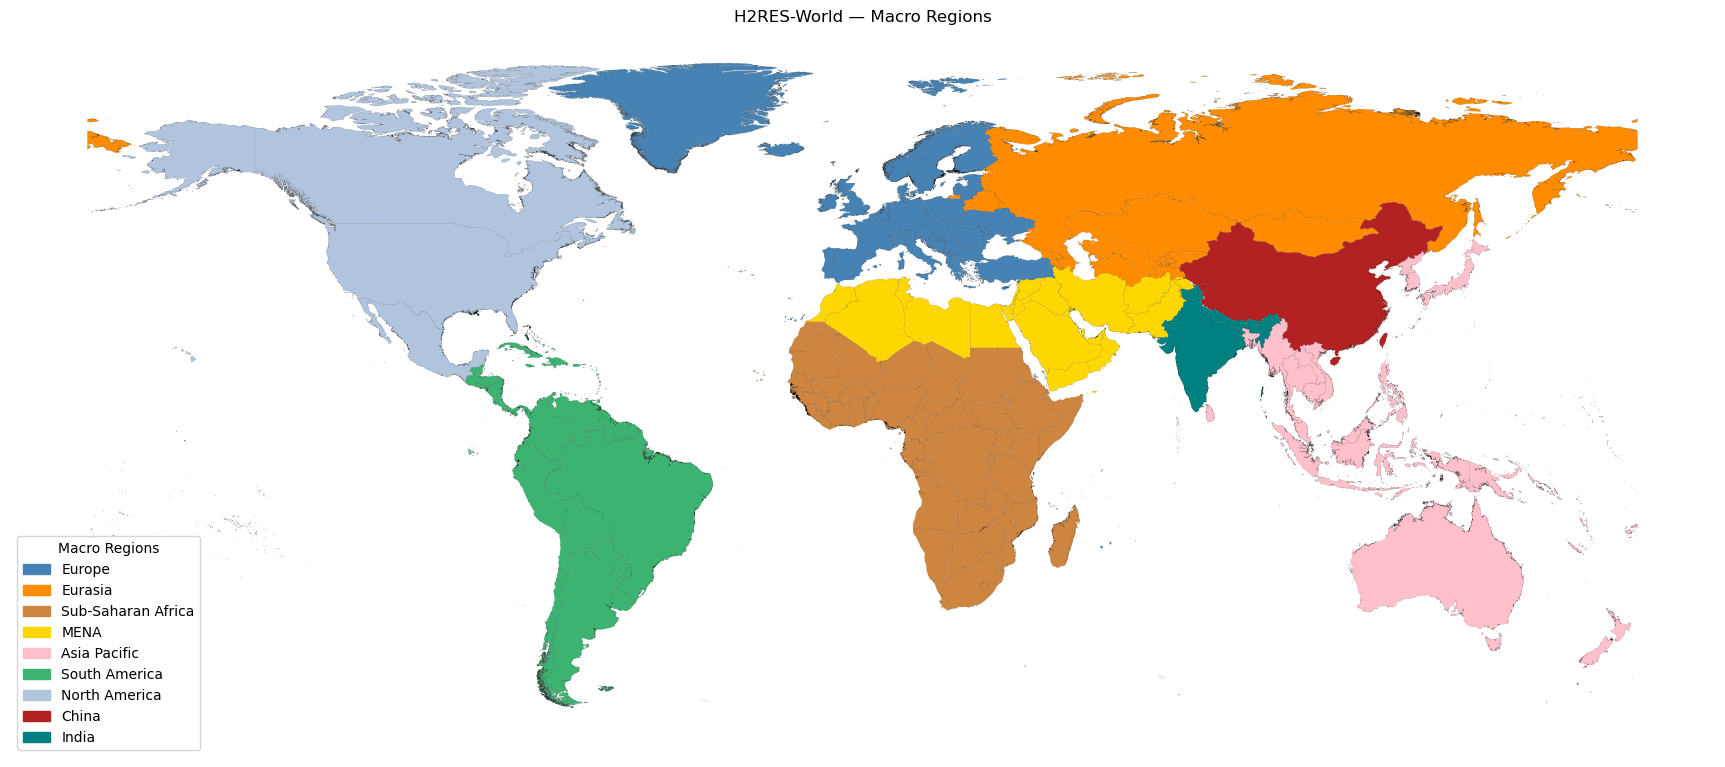

In [14]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

region_lists = {
    "Europe": EUROPE,
    "Eurasia": EURASIA,
    "Sub-Saharan Africa": SUBSAHARAN_AFRICA,
    "MENA": MENA,
    "Asia Pacific": ASIA_PACIFIC,
    "South America": SOUTH_AMERICA,
    "North America": NORTH_AMERICA,
    "China": CHINA_REGION,
    "India": INDIA_PLUS,
}

region_colors = {
    "Europe": "steelblue",
    "Eurasia": "darkorange",
    "Sub-Saharan Africa": "peru",
    "MENA": "gold",
    "Asia Pacific": "pink",
    "South America": "mediumseagreen",
    "North America": "lightsteelblue",
    "China": "firebrick",
    "India": "teal",
}

# Save location (relative to repo root)
base_dir = Path.cwd().parents[0]
output_dir = base_dir / "Maps" / "Layer0_MacroRegions"
output_dir.mkdir(parents=True, exist_ok=True)
pdf_path = output_dir / "H2RES_World_MacroRegions_L0.pdf"

fig, ax = plt.subplots(figsize=(22, 12))
gdf.plot(ax=ax, color="whitesmoke", edgecolor="#00000020", linewidth=0.05)

for region, names in region_lists.items():
    gdf[gdf["NAM_0"].isin(names)].plot(
        ax=ax,
        color=region_colors[region],
        edgecolor="black",
        linewidth=0.05
    )

legend_patches = [
    mpatches.Patch(color=region_colors[k], label=k)
    for k in region_lists.keys()
]

ax.legend(handles=legend_patches, loc="lower left", title="Macro Regions", fontsize=10)
ax.set_title("H2RES-World — Macro Regions")
ax.set_axis_off()

fig.savefig(pdf_path, format="pdf", dpi=100, bbox_inches="tight")


# Built with ISO 3

In [15]:
# Build an effective ISO code column for regional grouping.
# If ISO_A3 is missing or blank, fall back to ISO_A3_CUSTOM.
gdf["ISO_A3_EFF"] = gdf["ISO_A3"]
mask_missing = gdf["ISO_A3_EFF"].isna() | (gdf["ISO_A3_EFF"].str.strip() == "")
gdf.loc[mask_missing, "ISO_A3_EFF"] = gdf.loc[mask_missing, "ISO_A3_CUSTOM"]

# Collect ISO codes per region using NAM_0 membership and ISO_A3_EFF.
# This keeps region lists consistent even for disputed areas with custom ISO codes.
region_iso3 = {
    region: sorted(gdf[gdf["NAM_0"].isin(names)]["ISO_A3_EFF"].dropna().unique())
    for region, names in region_lists.items()
}

# Unpack per-region lists for later plotting and exports.
ISO3_EUROPE = region_iso3["Europe"]
ISO3_EURASIA = region_iso3["Eurasia"]
ISO3_SUBSAHARAN_AFRICA = region_iso3["Sub-Saharan Africa"]
ISO3_MENA = region_iso3["MENA"]
ISO3_ASIAPACIFIC = region_iso3["Asia Pacific"]
ISO3_SOUTHAMERICA = region_iso3["South America"]
ISO3_NORTHAMERICA = region_iso3["North America"]
ISO3_CHINA_REGION = region_iso3["China"]
ISO3_INDIA_REGION = region_iso3["India"]


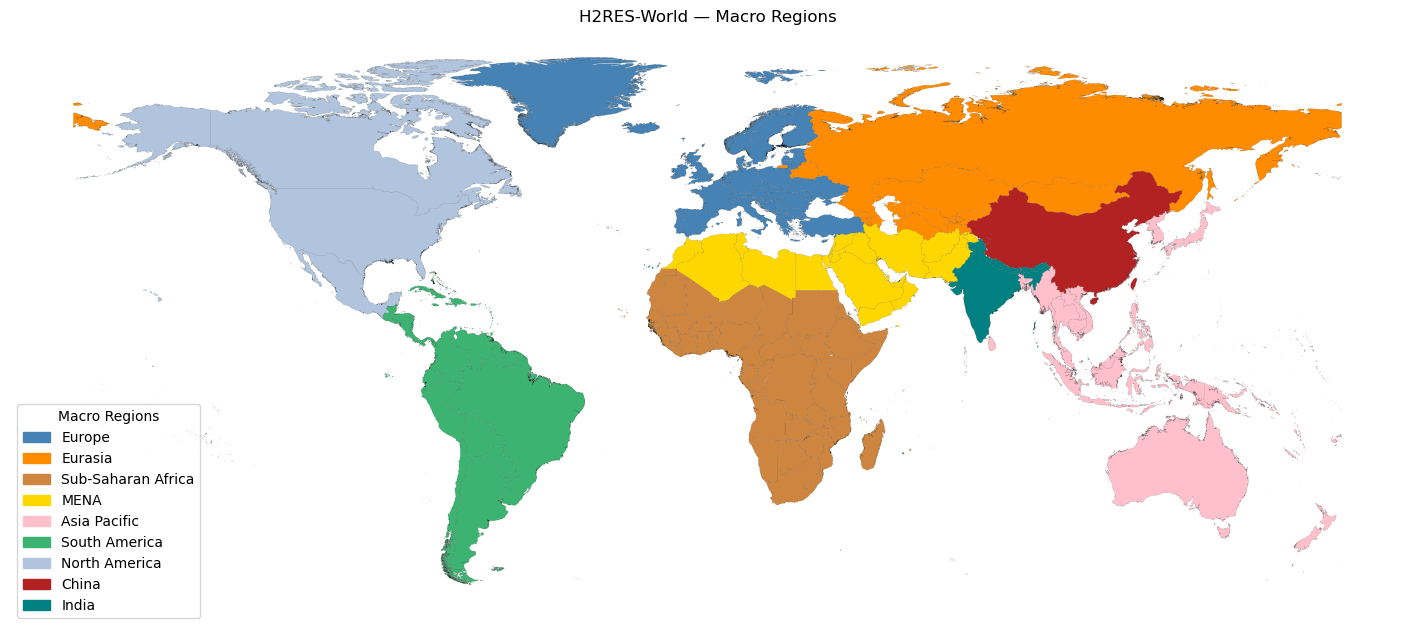

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

region_iso3 = {
    "Europe": ISO3_EUROPE,
    "Eurasia": ISO3_EURASIA,
    "Sub-Saharan Africa": ISO3_SUBSAHARAN_AFRICA,
    "MENA": ISO3_MENA,
    "Asia Pacific": ISO3_ASIAPACIFIC,
    "South America": ISO3_SOUTHAMERICA,
    "North America": ISO3_NORTHAMERICA,
    "China": ISO3_CHINA_REGION,
    "India": ISO3_INDIA_REGION,
}

region_colors = {
    "Europe": "steelblue",
    "Eurasia": "darkorange",
    "Sub-Saharan Africa": "peru",
    "MENA": "gold",
    "Asia Pacific": "pink",
    "South America": "mediumseagreen",
    "North America": "lightsteelblue",
    "China": "firebrick",
    "India": "teal",
}

# Save location (relative to repo root)
base_dir = Path.cwd().parents[0]
output_dir = base_dir / "Maps" / "Layer0_MacroRegions"
output_dir.mkdir(parents=True, exist_ok=True)
pdf_path = output_dir / "H2RES_World_MacroRegions_L0.pdf"

# Simplify geometry just for plotting
gdf_plot = gdf.copy()
gdf_plot["geometry"] = gdf_plot.geometry.simplify(0.05, preserve_topology=True)

fig, ax = plt.subplots(figsize=(18, 10))
gdf_plot.plot(ax=ax, color="whitesmoke", edgecolor="#00000020", linewidth=0.05)

for region, iso_list in region_iso3.items():
    gdf_plot[gdf_plot["ISO_A3_EFF"].isin(iso_list)].plot(
        ax=ax,
        color=region_colors[region],
        edgecolor="black",
        linewidth=0.05
    )

legend_patches = [
    mpatches.Patch(color=region_colors[k], label=k)
    for k in region_iso3.keys()
]

ax.legend(handles=legend_patches, loc="lower left", title="Macro Regions", fontsize=10)
ax.set_title("H2RES-World — Macro Regions")
ax.set_axis_off()

# Save lighter PDF
fig.savefig(pdf_path, format="pdf", dpi=80, bbox_inches="tight")
png_path = output_dir / "H2RES_World_MacroRegions_L0.png"
fig.savefig(png_path, dpi=150, bbox_inches="tight")



# Save interactive map

In [ ]:
# Requires folium: pip install folium
#!python -m pip install "folium>=0.12" matplotlib mapclassify

from pathlib import Path
import matplotlib.colors as mcolors

output_dir = base_dir / "Maps" / "Layer0_MacroRegions"
output_dir.mkdir(parents=True, exist_ok=True)
html_path = output_dir / "H2RES_World_MacroRegions_L0.html"

# Build region -> ISO lists mapping
region_iso3 = {
    "Europe": ISO3_EUROPE,
    "Eurasia": ISO3_EURASIA,
    "Sub-Saharan Africa": ISO3_SUBSAHARAN_AFRICA,
    "MENA": ISO3_MENA,
    "Asia Pacific": ISO3_ASIAPACIFIC,
    "South America": ISO3_SOUTHAMERICA,
    "North America": ISO3_NORTHAMERICA,
    "China": ISO3_CHINA_REGION,
    "India": ISO3_INDIA_REGION,
}

# Assign REGION based on ISO_A3_EFF
gdf["REGION"] = None
for region, codes in region_iso3.items():
    gdf.loc[gdf["ISO_A3_EFF"].isin(codes), "REGION"] = region

# Keep only needed columns
gdf_map = gdf[["NAM_0", "ISO_A3", "ISO_A3_EFF", "REGION", "geometry"]].copy()

# Simplify geometry (do it in meters for better control)
gdf_simplified = gdf_map.to_crs(3857)
gdf_simplified["geometry"] = gdf_simplified.geometry.simplify(10000, preserve_topology=True)  # ~20 km
gdf_simplified = gdf_simplified.to_crs(4326)

region_order = [
    "Europe", "Eurasia", "Sub-Saharan Africa", "MENA",
    "Asia Pacific", "South America", "North America", "China", "India"
]

region_colors = {
    "Europe": "steelblue",
    "Eurasia": "darkorange",
    "Sub-Saharan Africa": "peru",
    "MENA": "gold",
    "Asia Pacific": "pink",
    "South America": "mediumseagreen",
    "North America": "lightsteelblue",
    "China": "firebrick",
    "India": "teal",
}

cmap = mcolors.ListedColormap([region_colors[r] for r in region_order])

m = gdf_simplified.explore(
    column="REGION",
    categorical=True,
    categories=region_order,
    cmap=cmap,
    legend=True,
    tooltip=["NAM_0", "ISO_A3", "ISO_A3_EFF"]  # keep tooltip minimal
)

m.save(html_path)


# Save data for future layers

In [18]:
from pathlib import Path

base_dir = Path.cwd().parents[0]
out_dir = base_dir / "Data" / "World Bank Official Boundaries - Admin 0_all_layers"
out_dir.mkdir(parents=True, exist_ok=True)

# GeoPackage 
gpkg_path = out_dir / "WB_GAD_ADM0_complete_H2RES.gpkg"
gdf.to_file(gpkg_path, layer="admin0_h2res", driver="GPKG")

# Shapefile 
shp_path = out_dir / "WB_GAD_ADM0_complete_H2RES.shp"
gdf.to_file(shp_path, driver="ESRI Shapefile")


C:\Users\sebas\AppData\Local\Temp\ipykernel_11160\2267429734.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(shp_path, driver="ESRI Shapefile")
c:\Users\sebas\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'ISO_A3_CUSTOM' to 'ISO_A3_CUS'
  ogr_write(
